In [312]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from load_to_db import data_file_dir, read_data_from_csv
%matplotlib inline
from datetime import datetime

In [313]:
# Load data
file_dir = data_file_dir()
df = read_data_from_csv(file_dir)

In [314]:
# Select one elephant
AM105 = df[df['tag_id'] == 'AM105']
print(AM105)

       Unnamed: 0                timestamp      long       lat  \
0               0  2007-08-13 00:30:00.000  31.87091 -24.81373   
1               1  2007-08-13 02:00:00.000  31.87399 -24.81483   
2               2  2007-08-13 03:31:00.000  31.87724 -24.81673   
3               3  2007-08-13 04:00:00.000  31.87822 -24.81569   
4               4  2007-08-13 06:00:00.000  31.89554 -24.79870   
...           ...                      ...       ...       ...   
15093       15093  2009-08-12 19:30:00.000  31.81571 -24.71985   
15094       15094  2009-08-12 20:00:00.000  31.81562 -24.71988   
15095       15095  2009-08-12 20:30:00.000  31.81518 -24.72014   
15096       15096  2009-08-12 21:00:00.000  31.81211 -24.72042   
15097       15097  2009-08-12 21:30:00.000  31.81086 -24.72041   

       external-temperature tag_id  year  month  day  hour  minute  
0                      24.0  AM105  2007      8   13     0      30  
1                      23.0  AM105  2007      8   13     2       0  


In [315]:
# Creating date column
AM105['date'] = pd.to_datetime(AM105['timestamp']).dt.date
print(AM105)


       Unnamed: 0                timestamp      long       lat  \
0               0  2007-08-13 00:30:00.000  31.87091 -24.81373   
1               1  2007-08-13 02:00:00.000  31.87399 -24.81483   
2               2  2007-08-13 03:31:00.000  31.87724 -24.81673   
3               3  2007-08-13 04:00:00.000  31.87822 -24.81569   
4               4  2007-08-13 06:00:00.000  31.89554 -24.79870   
...           ...                      ...       ...       ...   
15093       15093  2009-08-12 19:30:00.000  31.81571 -24.71985   
15094       15094  2009-08-12 20:00:00.000  31.81562 -24.71988   
15095       15095  2009-08-12 20:30:00.000  31.81518 -24.72014   
15096       15096  2009-08-12 21:00:00.000  31.81211 -24.72042   
15097       15097  2009-08-12 21:30:00.000  31.81086 -24.72041   

       external-temperature tag_id  year  month  day  hour  minute        date  
0                      24.0  AM105  2007      8   13     0      30  2007-08-13  
1                      23.0  AM105  2007     

C:\Users\BerillVarga\AppData\Local\Temp\ipykernel_8364\1465513555.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [316]:
# Mean number of instances/observations per day
minPoint = int(AM105['date'].groupby([AM105['date']]).count().mean()) * 2


Let's say that a core point is defined as two times the average number of instances/observations per day. Thus, for a point to count as a core point, two days of obesrvation points has to be within its surrounding area.

In [317]:
AM105[['long', 'lat']].describe()

long           lat
count  15098.000000  15098.000000
mean      31.847322    -24.858308
std        0.078876      0.213351
min       31.510030    -25.226230
25%       31.822205    -25.047615
50%       31.870135    -24.903570
75%       31.895847    -24.718447
max       31.976310    -24.294300

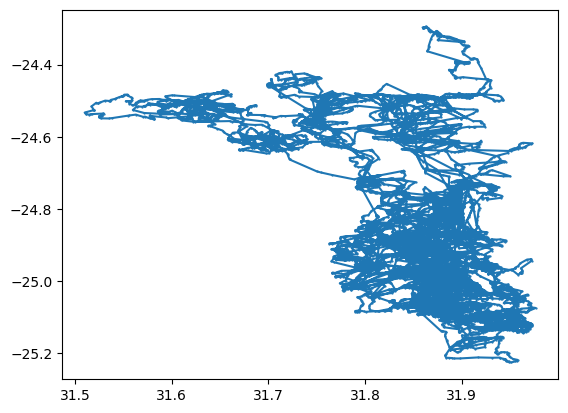

In [318]:
# Data inspection with scatter plot
# plt.scatter(AM105['long'], AM105['lat'], s = 0.4)
plt.plot(AM105['long'], AM105['lat'], marker = 'o', markersize = 0.6)
plt.show()

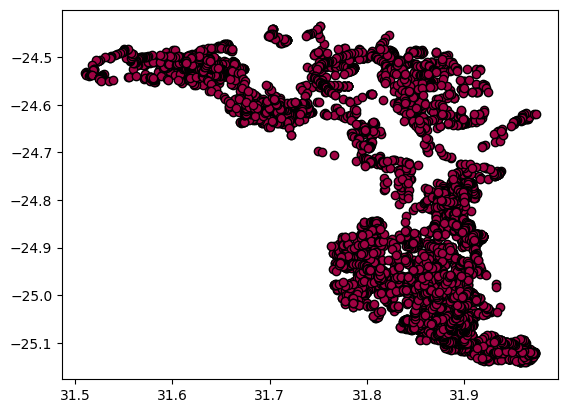

In [319]:
AM105_one_year = AM105.loc[(AM105['date'] >= datetime.strptime('2007-11-01', '%Y-%m-%d').date()) & 
                           (AM105['date'] <= datetime.strptime('2008-10-31', '%Y-%m-%d').date())]

plt.plot(AM105_one_year['long'], AM105_one_year['lat'], 'o', c = plt.cm.Spectral(1), markeredgecolor="k")
plt.show()

In [320]:
scaler = StandardScaler()

AM105[['long_norm', 'lat_norm']] = scaler.fit_transform(AM105[['long', 'lat']])

# AM105_norm = pd.DataFrame(AM105, columns = ['long_norm', 'lat_norm'])
# print(AM105_norm)

# AM105_non_norm = AM105[['long', 'lat']]
print(AM105)

       Unnamed: 0                timestamp      long       lat  \
0               0  2007-08-13 00:30:00.000  31.87091 -24.81373   
1               1  2007-08-13 02:00:00.000  31.87399 -24.81483   
2               2  2007-08-13 03:31:00.000  31.87724 -24.81673   
3               3  2007-08-13 04:00:00.000  31.87822 -24.81569   
4               4  2007-08-13 06:00:00.000  31.89554 -24.79870   
...           ...                      ...       ...       ...   
15093       15093  2009-08-12 19:30:00.000  31.81571 -24.71985   
15094       15094  2009-08-12 20:00:00.000  31.81562 -24.71988   
15095       15095  2009-08-12 20:30:00.000  31.81518 -24.72014   
15096       15096  2009-08-12 21:00:00.000  31.81211 -24.72042   
15097       15097  2009-08-12 21:30:00.000  31.81086 -24.72041   

       external-temperature tag_id  year  month  day  hour  minute  \
0                      24.0  AM105  2007      8   13     0      30   
1                      23.0  AM105  2007      8   13     2       0 

C:\Users\BerillVarga\AppData\Local\Temp\ipykernel_8364\3509160003.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\BerillVarga\AppData\Local\Temp\ipykernel_8364\3509160003.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [321]:
AM105[['long', 'lat', 'long_norm', 'lat_norm']].describe()

long           lat     long_norm      lat_norm
count  15098.000000  15098.000000  1.509800e+04  1.509800e+04
mean      31.847322    -24.858308 -2.575235e-14 -1.909589e-14
std        0.078876      0.213351  1.000033e+00  1.000033e+00
min       31.510030    -25.226230 -4.276360e+00 -1.724546e+00
25%       31.822205    -25.047615 -3.184450e-01 -8.873305e-01
50%       31.870135    -24.903570  2.892362e-01 -2.121541e-01
75%       31.895847    -24.718447  6.152325e-01  6.555633e-01
max       31.976310    -24.294300  1.635377e+00  2.643653e+00

In [322]:
# Nov-apr
AM105_rain = AM105.loc[(AM105['date'] >= datetime.strptime('2007-11-01', '%Y-%m-%d').date()) & 
                       (AM105['date'] <= datetime.strptime('2008-04-30', '%Y-%m-%d').date())]

# May-oct
AM105_dry = AM105.loc[(AM105['date'] >= datetime.strptime('2008-05-01', '%Y-%m-%d').date()) & 
                      (AM105['date'] <= datetime.strptime('2008-10-31', '%Y-%m-%d').date())]

In [323]:
# AM105[['long', 'lat']].groupby([AM105['date']]).mean()

# AM105_rain

# DBSCAN

In [324]:
# Imports
import numpy as np
from sklearn.cluster import DBSCAN

In [325]:
# Training the model
## Rain
db_rain = DBSCAN(eps = 0.2, min_samples = minPoint).fit(AM105_rain[['long_norm', 'lat_norm']])
AM105_rain['labels'] = db_rain.labels_
# AM105_rain

## Dry
db_dry = DBSCAN(eps = 0.2, min_samples = minPoint).fit(AM105_dry[['long_norm', 'lat_norm']])
AM105_dry['labels'] = db_dry.labels_
# AM105_dry

C:\Users\BerillVarga\AppData\Local\Temp\ipykernel_8364\3094151550.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\BerillVarga\AppData\Local\Temp\ipykernel_8364\3094151550.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [326]:
# Number of clusters in labels, ignoring noise if present
## Rain
rain_n_clusters_ = len(set(AM105_rain['labels'])) - (1 if -1 in AM105_rain['labels'].unique() else 0)
rain_n_noise_ = list(AM105_rain['labels']).count(-1)

print("Estimated number of clusters: %d" % rain_n_clusters_)
print("Estimated number of noise points: %d" % rain_n_noise_)


## Dry
dry_n_clusters_ = len(set(AM105_dry['labels'])) - (1 if -1 in AM105_dry['labels'].unique() else 0)
dry_n_noise_ = list(AM105_dry['labels']).count(-1)

print("Estimated number of clusters: %d" % dry_n_clusters_)
print("Estimated number of noise points: %d" % dry_n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 289
Estimated number of clusters: 3
Estimated number of noise points: 272


In [327]:
## Rain
rain_unique_labels = set(AM105_rain['labels'])
rain_core_samples_mask = np.zeros_like(AM105_rain['labels'], dtype=bool)
rain_core_samples_mask[db_rain.core_sample_indices_] = True
AM105_rain['core_samples_mask'] = rain_core_samples_mask


## Dry
dry_unique_labels = set(AM105_dry['labels'])
dry_core_samples_mask = np.zeros_like(AM105_dry['labels'], dtype=bool)
dry_core_samples_mask[db_dry.core_sample_indices_] = True
AM105_dry['core_samples_mask'] = dry_core_samples_mask

C:\Users\BerillVarga\AppData\Local\Temp\ipykernel_8364\3524027472.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\BerillVarga\AppData\Local\Temp\ipykernel_8364\3524027472.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [328]:
print(AM105_rain['labels'].groupby([AM105_rain['labels']]).count())

print(AM105_dry['labels'].groupby([AM105_dry['labels']]).count())

labels
-1     289
 0     526
 1    1164
 2    1737
Name: labels, dtype: int64
labels
-1     272
 0    3022
 1      51
 2      47
Name: labels, dtype: int64


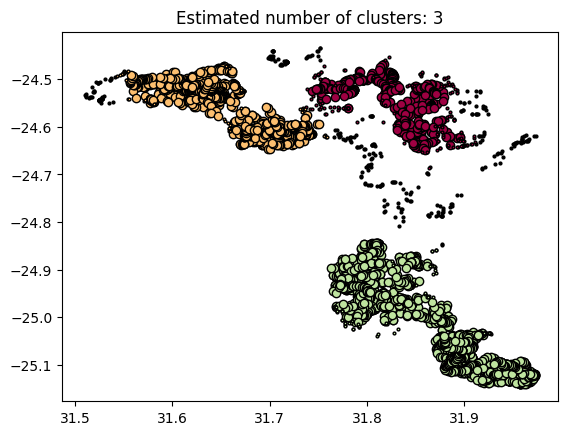

In [329]:
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(rain_unique_labels))]

for k, col in zip(rain_unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = AM105_rain['labels'] == k

    xy = AM105_rain.loc[class_member_mask & AM105_rain['core_samples_mask']]
    plt.plot(
        xy['long'],
        xy['lat'],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

    xy = AM105_rain.loc[class_member_mask & ~AM105_rain['core_samples_mask']]
    plt.plot(
        xy['long'],
        xy['lat'],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=2,
    )

plt.title(f"Estimated number of clusters: {rain_n_clusters_}")
plt.show()

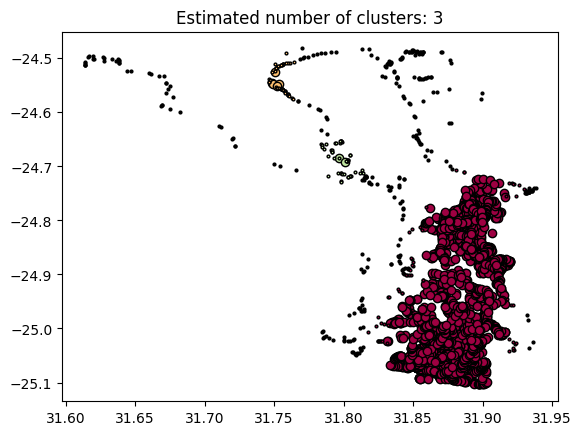

In [330]:
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(dry_unique_labels))]

for k, col in zip(dry_unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = AM105_dry['labels'] == k

    xy = AM105_dry.loc[class_member_mask & AM105_dry['core_samples_mask']]
    plt.plot(
        xy['long'],
        xy['lat'],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

    xy = AM105_dry.loc[class_member_mask & ~AM105_dry['core_samples_mask']]
    plt.plot(
        xy['long'],
        xy['lat'],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=2,
    )

plt.title(f"Estimated number of clusters: {dry_n_clusters_}")
plt.show()

In [331]:
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(dry_unique_labels))]
colors

[(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0),
 (0.9934640522875817, 0.7477124183006535, 0.4352941176470587, 1.0),
 (0.7477124183006538, 0.8980392156862746, 0.6274509803921569, 1.0),
 (0.3686274509803922, 0.30980392156862746, 0.6352941176470588, 1.0)]

In [332]:
import plotly.express as px
import plotly.graph_objects as go

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(rain_unique_labels))]

fig = go.Figure()

for k, col in zip(rain_unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
    
    class_member_mask = AM105_rain['labels'] == k

    xy = AM105_rain.loc[class_member_mask & AM105_rain['core_samples_mask']]
    # Bigger black points to add a border/edge to the points 
    fig.add_trace(go.Scattermapbox(
        lat = xy['lat'],
        lon = xy['long'],
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=14,
            color=f'rgba{tuple([0, 0, 0, 1])}',
            opacity=1.0
        ),
        text=AM105_rain[['lat', 'long']],
        hoverinfo='text'
    ))

    # The color of the cluster
    fig.add_trace(go.Scattermapbox(
        lat = xy['lat'],
        lon = xy['long'],
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=12,
            color=f'rgba{tuple(col)}',
            opacity=1.0
        ),
        text=AM105_rain[['lat', 'long']],
        hoverinfo='text'
    ))



    xy = AM105_rain.loc[class_member_mask & ~AM105_rain['core_samples_mask']]
    # Bigger black points to add a border/edge to the points 
    fig.add_trace(go.Scattermapbox(
        lat = xy['lat'],
        lon = xy['long'],
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=9,
            color=f'rgba{tuple([0, 0, 0, 1])}',
            opacity=1.0
        ),
        text=AM105_rain[['lat', 'long']],
        hoverinfo='text',
    ))

    # The color of the cluster
    fig.add_trace(go.Scattermapbox(
        lat = xy['lat'],
        lon = xy['long'],
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=7,
            color=f'rgba{tuple(col)}',
            opacity=1.0
        ),
        text=AM105_rain[['lat', 'long']],
        hoverinfo='text',
    ))


fig.update_layout(mapbox_style="stamen-terrain")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0},
mapbox={'center': go.layout.mapbox.Center(lat=-24.8, lon=32), 'zoom': 8})
fig.show()

In [333]:
import plotly.express as px
import plotly.graph_objects as go

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(dry_unique_labels))]

fig = go.Figure()

for k, col in zip(dry_unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
    
    class_member_mask = AM105_dry['labels'] == k

    xy = AM105_dry.loc[class_member_mask & AM105_dry['core_samples_mask']]
    # Bigger black points to add a border/edge to the points 
    fig.add_trace(go.Scattermapbox(
        lat = xy['lat'],
        lon = xy['long'],
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=14,
            color=f'rgba{tuple([0, 0, 0, 1])}',
            opacity=1.0
        ),
        text=AM105_dry[['lat', 'long']],
        hoverinfo='text'
    ))

    # The color of the cluster
    fig.add_trace(go.Scattermapbox(
        lat = xy['lat'],
        lon = xy['long'],
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=12,
            color=f'rgba{tuple(col)}',
            opacity=1.0
        ),
        text=AM105_dry[['lat', 'long']],
        hoverinfo='text'
    ))



    xy = AM105_dry.loc[class_member_mask & ~AM105_dry['core_samples_mask']]
    # Bigger black points to add a border/edge to the points 
    fig.add_trace(go.Scattermapbox(
        lat = xy['lat'],
        lon = xy['long'],
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=9,
            color=f'rgba{tuple([0, 0, 0, 1])}',
            opacity=1.0
        ),
        text=AM105_dry[['lat', 'long']],
        hoverinfo='text',
    ))

    # The color of the cluster
    fig.add_trace(go.Scattermapbox(
        lat = xy['lat'],
        lon = xy['long'],
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=7,
            color=f'rgba{tuple(col)}',
            opacity=1.0
        ),
        text=AM105_dry[['lat', 'long']],
        hoverinfo='text',
    ))


fig.update_layout(mapbox_style="stamen-terrain")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0},
mapbox={'center': go.layout.mapbox.Center(lat=-24.8, lon=32), 'zoom': 8})
fig.show()